In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [2]:
cars=pd.read_csv("Real_life.csv")
cars.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
cars.shape

(4345, 9)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4345 non-null object
Price           4173 non-null float64
Body            4345 non-null object
Mileage         4345 non-null int64
EngineV         4195 non-null float64
Engine Type     4345 non-null object
Registration    4345 non-null object
Year            4345 non-null int64
Model           4345 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,4345,7,Volkswagen,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4173,NaN,NaN,NaN,19418.7,25584.2,600,6999,11500,21700,300000
Body,4345,6,sedan,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,4345,NaN,NaN,NaN,161.237,105.706,0,86,155,230,980
EngineV,4195,NaN,NaN,NaN,2.79073,5.06644,0.6,1.8,2.2,3,99.99
Engine Type,4345,4,Diesel,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,4345,2,yes,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4345,NaN,NaN,NaN,2006.55,6.7191,1969,2003,2008,2012,2016
Model,4345,312,E-Class,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


WE notice that in all features above mean differs from mode, so we expect a lot of outliers

In [6]:
cars.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
mean_p=np.mean(cars['Price'])
mean_p

19418.74693505871

In [8]:
cars['Price']=cars['Price'].fillna(mean_p,axis=0)

In [9]:
mean_EV=np.mean(cars['EngineV'])

In [10]:
cars['EngineV']=cars['EngineV'].fillna(mean_EV,axis=0)

In [11]:
#cars.isnull().sum()

In [12]:
cars.Registration.value_counts()

yes    3947
no      398
Name: Registration, dtype: int64

In [13]:
cars['Registration']=cars['Registration'].map({'yes':1,'no':0})

In [14]:
cars.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,1,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011,Rav 4


In [15]:
cars['Engine Type'].value_counts()

Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: Engine Type, dtype: int64

In [16]:
cars.Body.value_counts()

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64

In [17]:
cars.Brand.value_counts()

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64

In [18]:
cars.drop('Model',axis=1,inplace=True)

In [19]:
cars_nmv=cars.copy()

## Exploring the PDF-s

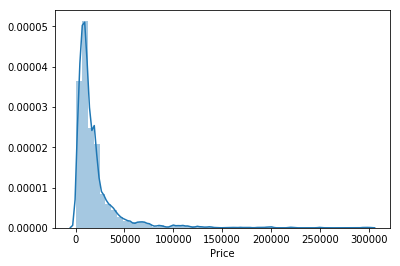

In [20]:
sns.distplot(cars_nmv['Price'])

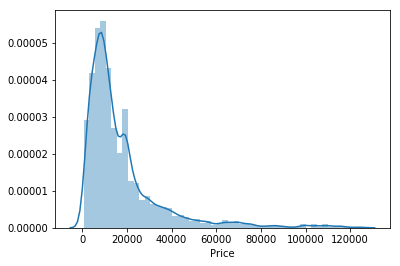

In [24]:
#Let remove outliers on price
q= cars_nmv['Price'].quantile(0.99)
df1=cars_nmv[cars_nmv['Price']<q]
sns.distplot(df1['Price'])

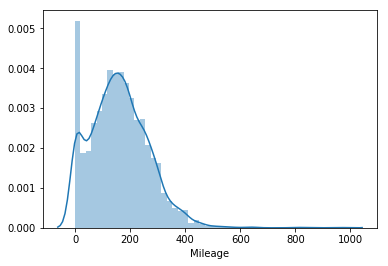

In [25]:
sns.distplot(cars_nmv['Mileage'])

In [34]:
q=df1['Mileage'].quantile(0.99)

In [35]:
df2=df1[df1['Mileage']<q]

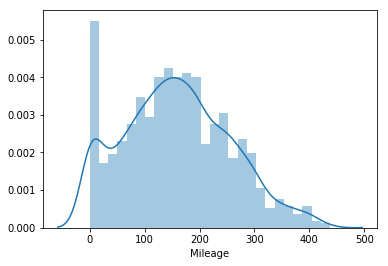

In [36]:
sns.distplot(df2['Mileage'])

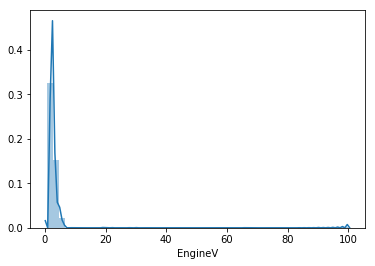

In [37]:
sns.distplot(df2['EngineV'])

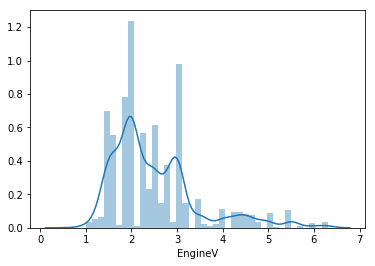

In [31]:
df3=df2[df2['EngineV']<6.5]
sns.distplot(df3['EngineV'])

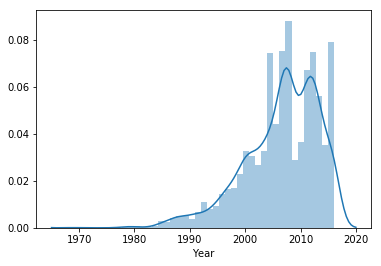

In [32]:
sns.distplot(cars_nmv['Year'])

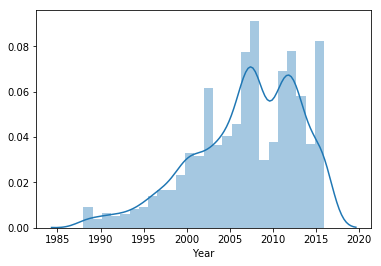

In [38]:
q=df3['Year'].quantile(0.01)
df4=df3[df3['Year']>q]
sns.distplot(df4['Year'])

In [40]:
cleaned_data=df4.reset_index(drop=True)

In [41]:
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,1,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,1,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,1,2011


In [42]:
cleaned_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4219,4219.000000,4219,4219.000000,4219.000000,4219,4219.000000,4219.000000
unique,7,NaN,6,NaN,NaN,4,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN,NaN
freq,902,NaN,1586,NaN,NaN,1969,NaN,NaN
mean,NaN,19784.675480,NaN,156.234416,2.500893,NaN,0.907798,2006.951410
std,NaN,25297.184622,NaN,97.545833,0.966489,NaN,0.289345,6.170661
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,0.000000,1988.000000
25%,NaN,7400.000000,NaN,84.000000,1.900000,NaN,1.000000,2003.000000
50%,NaN,12100.000000,NaN,152.000000,2.200000,NaN,1.000000,2008.000000
75%,NaN,21300.000000,NaN,222.000000,3.000000,NaN,1.000000,2012.000000


## CHECKING OLS ASSUMPTIONS

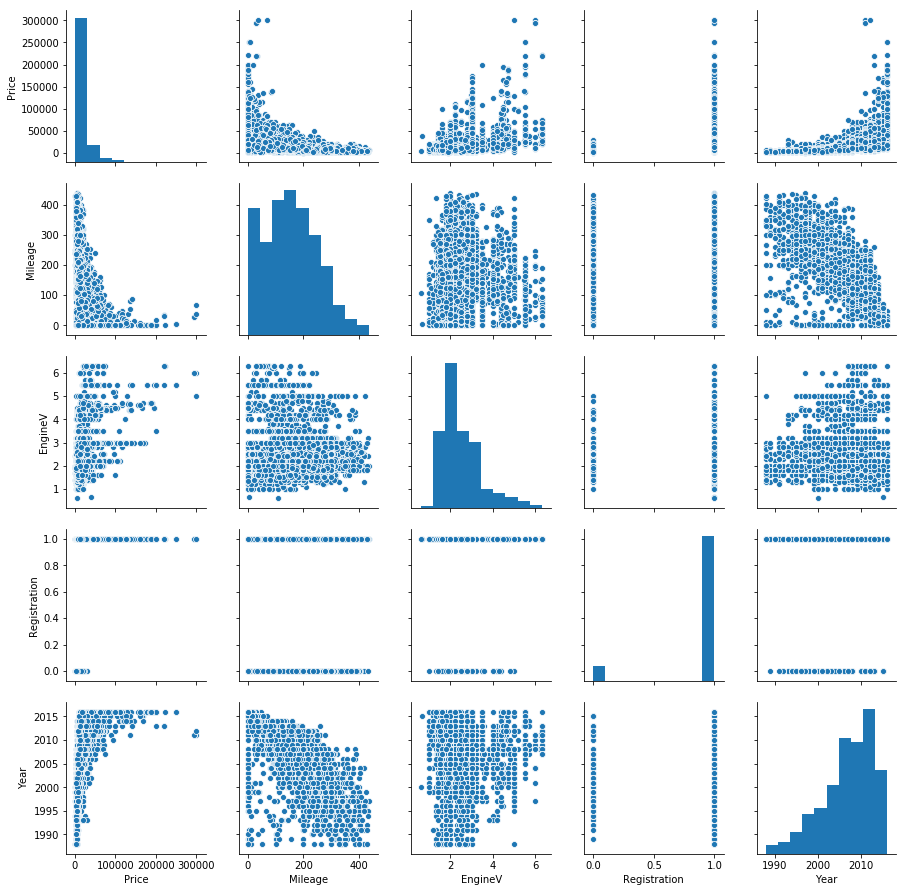

In [44]:
sns.pairplot(cleaned_data)
plt.show()

WE notice from above graph that trends are not definitely linear,so we should make some transformations.

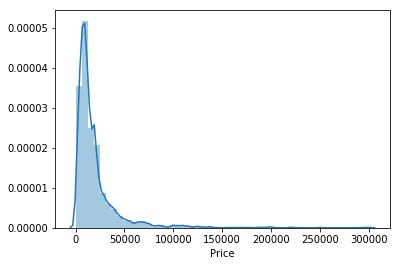

In [45]:
sns.distplot(cleaned_data['Price'])

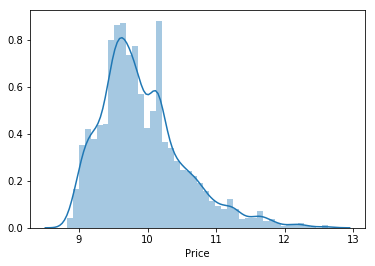

In [48]:
cleaned_data['Price']=np.log(cleaned_data['Price']+ 6000)
sns.distplot(cleaned_data['Price'])

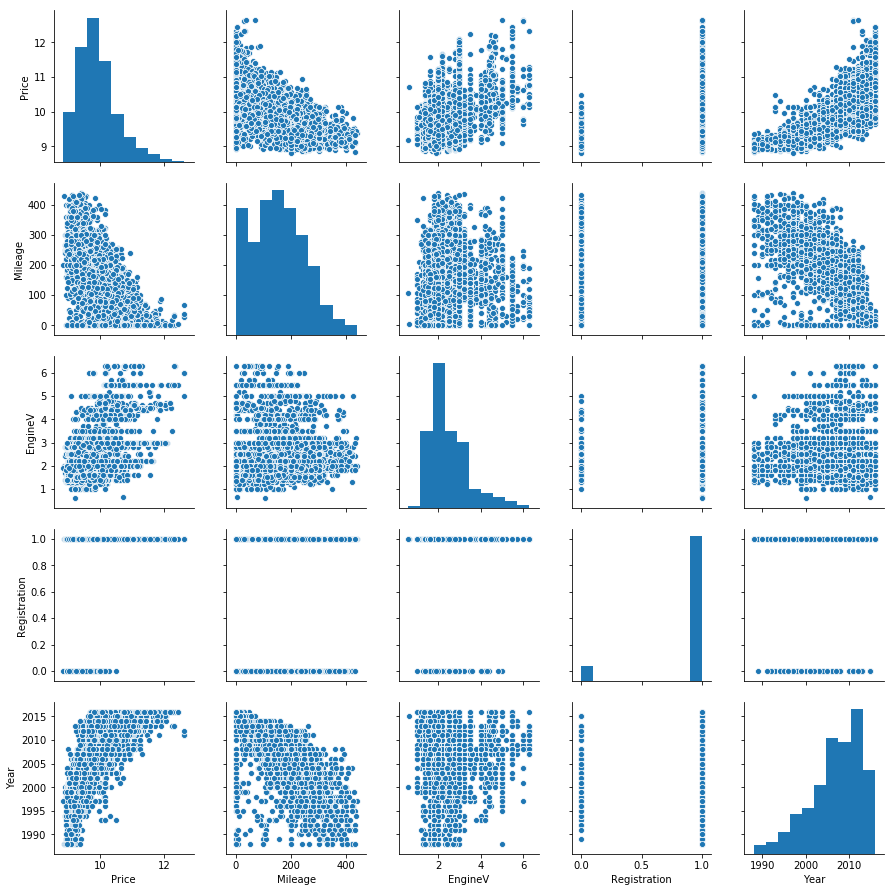

In [49]:
sns.pairplot(cleaned_data)
plt.show()

### MULTICOLLINEARITY - VIF (VARIANCE INFLATION FACTOR)

In [52]:
cleaned_data.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'], dtype=object)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
#We are checking only the continous variables we have so far
variables=cleaned_data[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [61]:
vif['features']=variables.columns

In [62]:
vif

,VIF,features
0,3.548813,Mileage
1,7.719205,EngineV
2,10.669967,Year


In [63]:
data_no_multicorr=cleaned_data.drop('Year',axis=1)

### CREATING DUMMIES ON CATEGORICAL DATA-PREPROCESSING

In [64]:
data_with_dummies=pd.get_dummies(data_no_multicorr,drop_first=True)
data_with_dummies

,Price,Mileage,EngineV,Registration,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,9.230143,277,2.000000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,9.539644,427,2.900000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.867860,358,5.000000,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.275051,240,4.200000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10.098232,120,2.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,12.235627,0,5.500000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,9.400961,438,2.000000,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
7,9.913438,200,2.700000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,9.729075,193,1.500000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9,8.909235,212,1.800000,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [65]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Registration', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [66]:
data_preprocessed=data_with_dummies.copy()

## Linear REgression Model

In [75]:
target=data_with_dummies['Price']
features=data_with_dummies.drop(['Price'],axis=1)


In [76]:
print(features.shape)
print(target.shape)

(4219, 17)
(4219,)


In [77]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
scaled.fit(features)
input_scaled=scaled.transform(features)

C:\Users\perdorues\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\perdorues\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_scaled,target,test_size=0.2,random_state=365)

In [79]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
predicted_train=reg.predict(x_train)

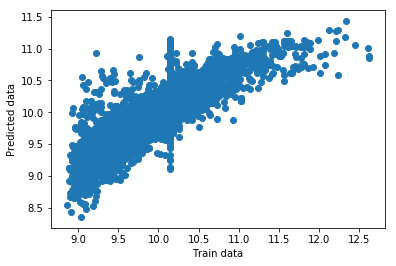

In [82]:
plt.scatter(y_train,predicted_train)
plt.xlabel('Train data')
plt.ylabel('Predicted data')
plt.show()

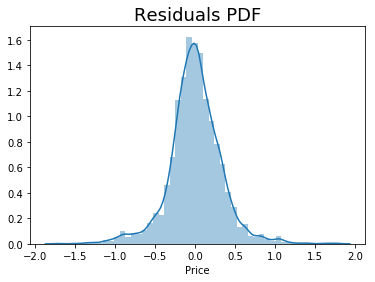

In [83]:
sns.distplot(y_train - predicted_train)
plt.title('Residuals PDF',size=18)
plt.show()

In [84]:
reg.score(x_train,y_train) # Score on training data

0.7098536226602596

In [85]:
reg.intercept_

9.922920915424765

In [86]:
reg.coef_

array([-0.32023696,  0.1714579 ,  0.16085023,  0.01238959,  0.01572096,
       -0.09551242, -0.11265536, -0.05027341, -0.06049375, -0.08656318,
       -0.06664149, -0.12954831, -0.07930669, -0.10362986, -0.08092244,
       -0.02145957, -0.09145108])

In [87]:
df=pd.DataFrame()
df['Intercept']=reg.intercept_
df['Coefficients']= reg.coef_

In [90]:
df.drop('Intercept',axis=1,inplace=True)

In [92]:
df['Features']=features.columns

In [93]:
df

,Coefficients,Features
0,-0.320237,Mileage
1,0.171458,EngineV
2,0.160850,Registration
3,0.012390,Brand_BMW
4,0.015721,Brand_Mercedes-Benz
5,-0.095512,Brand_Mitsubishi
6,-0.112655,Brand_Renault
7,-0.050273,Brand_Toyota
8,-0.060494,Brand_Volkswagen
9,-0.086563,Body_hatch


In [96]:
cleaned_data['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

We can see that Audi is not in the table above, so it was removed when we created dummies, so it is always possitive which means is the benchmark.When  coeff of dummy variables is positive that means that  the category is more expensive that the benchmark, in this case Audi.

### TESTING

In [97]:
pred_test=reg.predict(x_test)

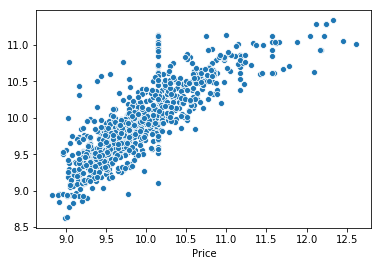

In [98]:
sns.scatterplot(y_test,pred_test)
plt.show()

In [100]:
reg.score(x_test,y_test)

0.6537646821907837

In [105]:
prediction_test_df=pd.DataFrame(pred_test,columns=['Prediciton'])
prediction_test_df.head() # These are logarithmic values, if we take exponential we get the original values

,Prediciton
0,9.844003
1,10.212759
2,10.039323
3,10.029326
4,9.294816


In [106]:
prediction_test_df_exp=pd.DataFrame(np.exp(pred_test),columns=['Prediciton'])
prediction_test_df_exp.head()

,Prediciton
0,18844.994675
1,27248.635548
2,22909.877294
3,22681.986380
4,10881.464298


In [107]:
y_test=y_test.reset_index(drop=True)

In [108]:
prediction_test_df_exp['Target']=np.exp(y_test)

In [109]:
prediction_test_df_exp

,Prediciton,Target
0,18844.994675,14800.000000
1,27248.635548,19000.000000
2,22909.877294,17400.000000
3,22681.986380,21500.000000
4,10881.464298,8450.000000
5,25704.493036,20200.000000
6,11437.025232,10500.000000
7,15551.305270,8500.000000
8,62850.135889,256000.000000
9,14827.779076,25418.746935


In [111]:
prediction_test_df_exp['Residuals']=prediction_test_df_exp['Target']-prediction_test_df_exp['Prediciton']

In [112]:
prediction_test_df_exp.head()

,Prediciton,Target,Residuals
0,18844.994675,14800.0,-4044.994675
1,27248.635548,19000.0,-8248.635548
2,22909.877294,17400.0,-5509.877294
3,22681.986380,21500.0,-1181.986380
4,10881.464298,8450.0,-2431.464298


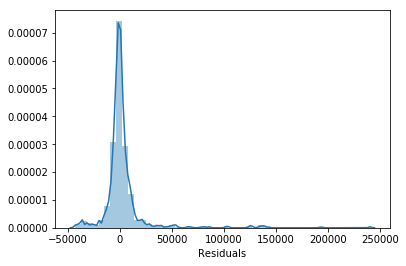

In [113]:
sns.distplot(prediction_test_df_exp['Residuals'])

In [115]:
prediction_test_df_exp['Difference%']=np.absolute(prediction_test_df_exp['Residuals']/prediction_test_df_exp['Target']*100)

In [116]:
prediction_test_df_exp.describe()

,Prediciton,Target,Residuals,Difference%
count,844.000000,844.000000,844.000000,844.000000
mean,24286.964920,26751.857610,2464.892690,28.496583
std,14061.055107,28569.258822,21324.335378,34.663123
min,5586.569964,6800.000000,-42875.758629,0.003479
25%,14471.592817,13500.000000,-3596.344552,8.951708
50%,20170.634345,18725.000000,-302.828752,19.615484
75%,30393.659383,27900.000000,3761.774541,35.015994
max,83675.809811,301000.000000,240081.141569,461.287364


When Residuals are negative means that predictions are larger than the mean bc of formula of residuals (Real value(target) - predicted)